In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape


(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
#classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense_2') is hidden1

False

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.00875558, -0.02369837, -0.04199817, ..., -0.03983337,
        -0.01815631, -0.04896355],
       [ 0.06155784, -0.00855951,  0.00891896, ...,  0.03839222,
        -0.07276843,  0.0388697 ],
       [ 0.03471227, -0.04278798,  0.00945807, ...,  0.05302344,
         0.062701  ,  0.01756614],
       ...,
       [-0.0166769 , -0.05089623, -0.04239072, ..., -0.0046026 ,
         0.01284785,  0.01130863],
       [-0.04763614,  0.04023109, -0.00177808, ..., -0.02703534,
         0.01514357,  0.06850165],
       [-0.05779291, -0.03784306,  0.01019249, ..., -0.06431554,
        -0.04786627,  0.03218051]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7117 - accuracy: 0.7649 - val_loss: 0.5059 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4891 - accuracy: 0.8289 - val_loss: 0.4688 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8430 - val_loss: 0.4462 - val_accuracy: 0.8444
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4156 - accuracy: 0.8530 - val_loss: 0.4165 - val_accuracy: 0.8546
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8609 - val_loss: 0.4086 - val_accuracy: 0.8544
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8675 - val_loss: 0.3705 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8715 - val_loss: 0.3949 - val_accuracy:

In [22]:
history.history

{'loss': [0.7116661071777344,
  0.48907798528671265,
  0.4421887695789337,
  0.4156191051006317,
  0.3945329785346985,
  0.3789528012275696,
  0.36462274193763733,
  0.35399743914604187,
  0.34383663535118103,
  0.33487898111343384,
  0.326424241065979,
  0.31949758529663086,
  0.31177979707717896,
  0.30447137355804443,
  0.29832449555397034,
  0.2929105758666992,
  0.2874312400817871,
  0.28135401010513306,
  0.27663111686706543,
  0.27142664790153503,
  0.26642462611198425,
  0.26220858097076416,
  0.25718483328819275,
  0.25238463282585144,
  0.24852809309959412,
  0.24406331777572632,
  0.2406178116798401,
  0.23579703271389008,
  0.2321360856294632,
  0.2278582900762558],
 'accuracy': [0.7648545503616333,
  0.8289090991020203,
  0.8430363535881042,
  0.8530363440513611,
  0.8609272837638855,
  0.8674727082252502,
  0.8715272545814514,
  0.8743273019790649,
  0.8791454434394836,
  0.8804181814193726,
  0.8822908997535706,
  0.8859454393386841,
  0.8880363702774048,
  0.89020001888

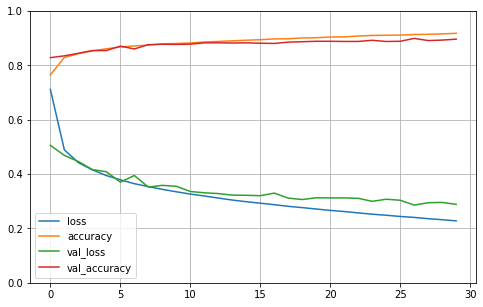

In [23]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8830


[0.3244572877883911, 0.8830000162124634]